## Parsing unity VR log file using functions in the locproc module

In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
# If you want to import files from the parent directory, please add the directory to the path:
#import sys, os, inspect
#currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
#parentdir = os.path.dirname(currentdir)
#sys.path.insert(0, os.path.dirname(parentdir))
#print(sys.path)

In [3]:
from unityvr.preproc import logproc
from unityvr.viz import viz

In [52]:
dirName = "/Users/hamida/Documents/Data/Test behavior/"
fileName = "Log_2025-08-04_17-36-10_fullfieldgrating-50degpersec-60fps.json"

dat = logproc.openUnityLog(dirName, fileName)

for i in range(5):
    print(dat[i]['frame'])
    print(json.dumps(dat[i], sort_keys=True, indent=4))

0.0
{
    "frame": 0.0,
    "frameAfterSplash": 0.0,
    "headerNotes": "fullfieldgrating-50degpersec-60fps                                                            ",
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0
}
0.0
{
    "frame": 0.0,
    "frameAfterSplash": 0.0,
    "heightPixels": 720,
    "refreshRateHz": 120,
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0,
    "widthPixels": 480
}
1.0
{
    "ficTracBallRadius": 0.4000000059604645,
    "ficTracServerAddress": "127.0.0.1",
    "ficTracServerPort": 2000,
    "ficTracSmoothingCount": 1,
    "frame": 1.0,
    "frameAfterSplash": 1.0,
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0
}
1.0
{
    "colliderType": "MeshCollider",
    "frame": 1.0,
    "frameAfterSplash": 1.0,
    "meshGameObjectPath": "Fly/FlyCamera4/FlyCamera4Screen",
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0,
    "worldPosition": {
        "x": -1.275976300239563,
        "y": -1.439996361732483,
        "z": -3.9270524978637695
    },
    "w

### Construct data object from log file
#### Extract header info

In [53]:
#print(dat[0]['headerNotes'])
logproc.makeMetaDict(dat, fileName)

{'expid': 'testExp',
 'experiment': 'test experiment',
 'genotype': 'testGenotype',
 'sex': 'NA',
 'flyid': 'NA',
 'trial': 'trialullfieldgrating-50degpersec-60fps',
 'date': '2025-08-04',
 'time': '17-36-10',
 'ballRad': 0.4000000059604645,
 'translationalGain': 1.0,
 'setFrameRate': 120,
 'notes': 'NA',
 'temperature': 'NA',
 'angle_convention': 'right-handed'}

#### Pull out object positions as pandas dataframe

In [54]:
objDf = logproc.objDfFromLog(dat)
objDf.head()

,name,collider,px,py,pz,rx,ry,rz,sx,sy,sz
0,Fly/FlyCamera4/FlyCamera4Screen,MeshCollider,-1.275976,-3.927052,-1.439996,0.0,0.0,18.000004,6.000001,1.0,10.1
1,Fly/FlyCamera1/FlyCamera1Screen,MeshCollider,-1.275976,3.927051,-1.439996,0.0,0.0,162.0,6.0,1.0,10.1
2,Fly/FlyCamera3/FlyCamera3Screen,MeshCollider,3.340549,-2.427051,-1.439996,0.0,0.0,306.0,6.0,1.0,10.1
3,Fly/FlyCamera2/FlyCamera2Screen,MeshCollider,3.340549,2.427051,-1.439996,0.0,0.0,234.0,6.0,1.0,10.1
4,BackgroundCylinder/default,NA,0.0,0.0,-1.49,0.0,0.0,90.0,-4.129001,4.129001,5.05


#### Pull out fly position as pandas dataframe
Position in VR

In [55]:
posDf, ftDf, tsDf = logproc.timeseriesDfFromLog(dat)

correcting for Unity angle convention.
No fictrac signal was recorded.


In [56]:
print(len(posDf))
posDf.head()

10529


,frame,time,dt,x,y,angle,dx_ft,dy_ft,dxattempt_ft,dyattempt_ft
0,1.0,0.000000,0.020000,0.006427,-9.992967,0.982788,0.006427,0.007033,0.006427,0.007033
1,2.0,0.020000,0.020000,0.008722,-9.993775,1.410187,0.002281,-0.000848,0.002281,-0.000848
2,3.0,0.047848,0.027848,0.015369,-9.988929,3.500061,0.006764,0.004681,0.006764,0.004681
3,4.0,0.084840,0.036992,0.014973,-9.991396,5.245239,-0.000546,-0.002438,-0.000546,-0.002438
4,5.0,0.118495,0.033655,0.017397,-9.986671,6.163757,0.002846,0.004484,0.002846,0.004484


In [57]:
tsDf['timenidaq'] = np.linspace(tsDf['time'].iloc[0], tsDf['time'].iloc[-1], len(tsDf))

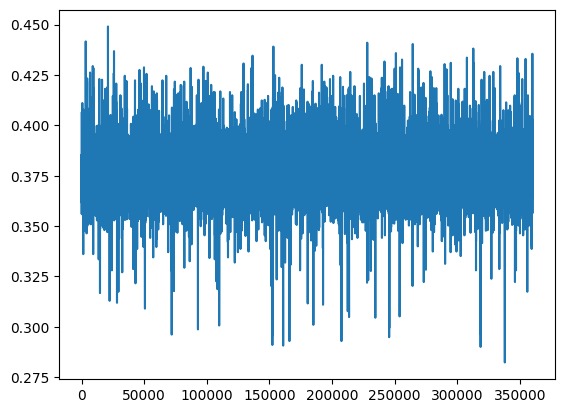

In [58]:
plt.plot(tsDf['pdsig'])


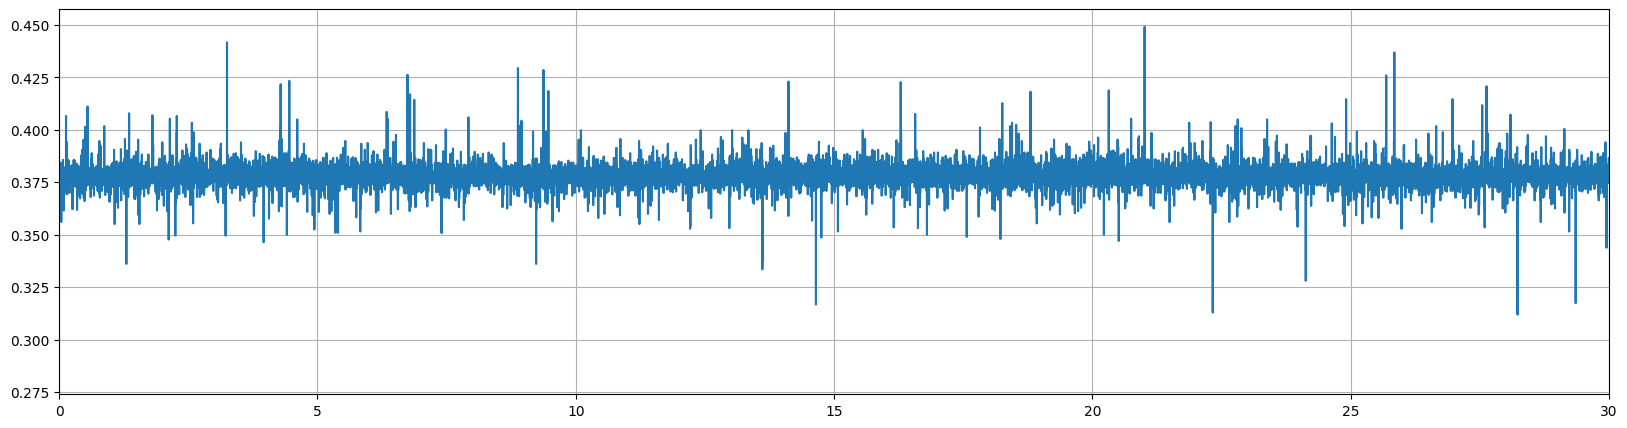

In [59]:
plt.figure(figsize = (20, 5))
import scipy as sp
#plt.plot(tsDf['timenidaq'], tsDf['pdsig'].values, '.'), 
plt.plot(tsDf['timenidaq'], tsDf['pdsig'].values), 
#plt.plot(tsDf['timenidaq'], (tsDf['pdsig'].values>1.05)/10 + 1.1 ), 

plt.xlim([0, 30])
plt.grid(True)



(28.0, 30.0)

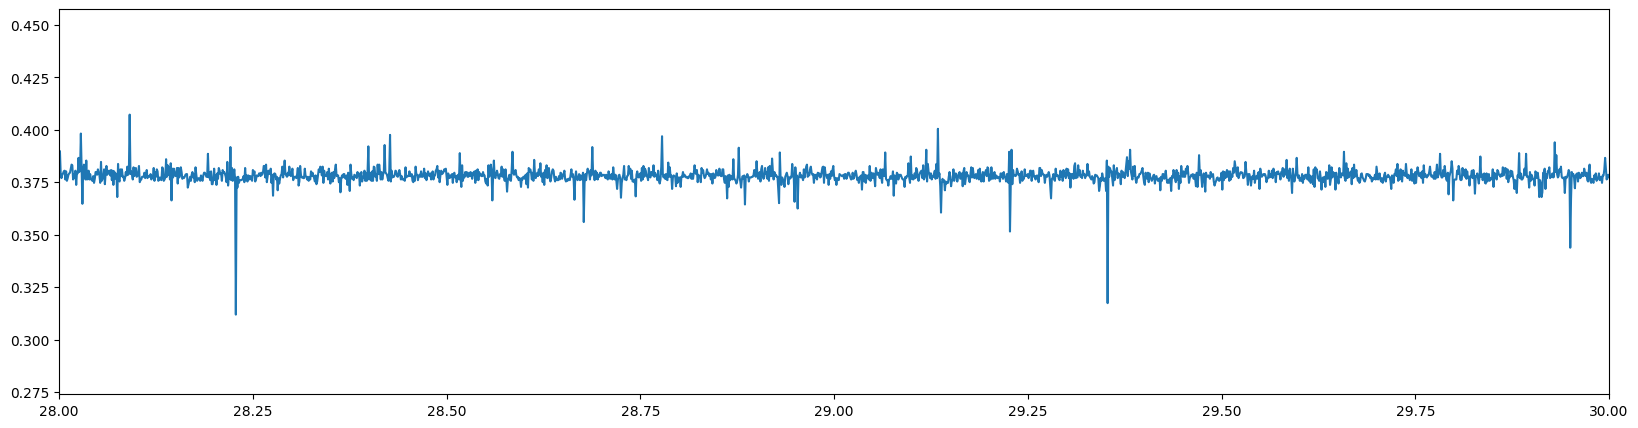

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(tsDf['timenidaq'].values, tsDf['pdsig'].values, label='pdsig')
plt.xlim([28, 30])
#plt.plot(tsDf['timeinterp'].values, (tsDf['pdsig'].values>1.05)/10 + 1.1 ), 
#plt.xlim([0.44, 0.45])
#xticks = np.arange(0.44, 0.451, 0.001)  
#plt.xticks(xticks)




In [61]:
# Extract ball radius
matching = [s for s in dat if "ficTracBallRadius" in s]
ballRadius = matching[0]["ficTracBallRadius"]
print(ballRadius) # in decimeters

#conversion factor to cm
dc2cm = 10

0.4000000059604645


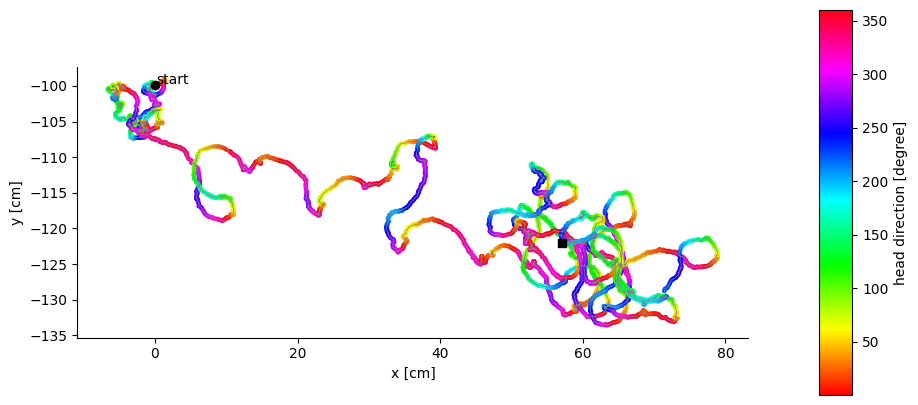

In [62]:
from unityvr.viz.utils import myAxisTheme

fig, axs = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'width_ratios':[20,1]})
axs[0].plot(posDf.x*dc2cm,posDf.y*dc2cm,color='grey', linewidth=0.5)
cb = axs[0].scatter(posDf.x*dc2cm,posDf.y*dc2cm,s=5,c=posDf.angle, cmap='hsv')
axs[0].plot(posDf.x[0]*dc2cm,posDf.y[0]*dc2cm,'ok')
axs[0].text(posDf.x[0]*dc2cm+0.2,posDf.y[0]*dc2cm+0.2,'start')
axs[0].plot(posDf.x.values[-1]*dc2cm,posDf.y.values[-2]*dc2cm,'sk')
axs[0].set_aspect('equal')
axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
myAxisTheme(axs[0])
plt.colorbar(cb,cax=axs[1], label='head direction [degree]')

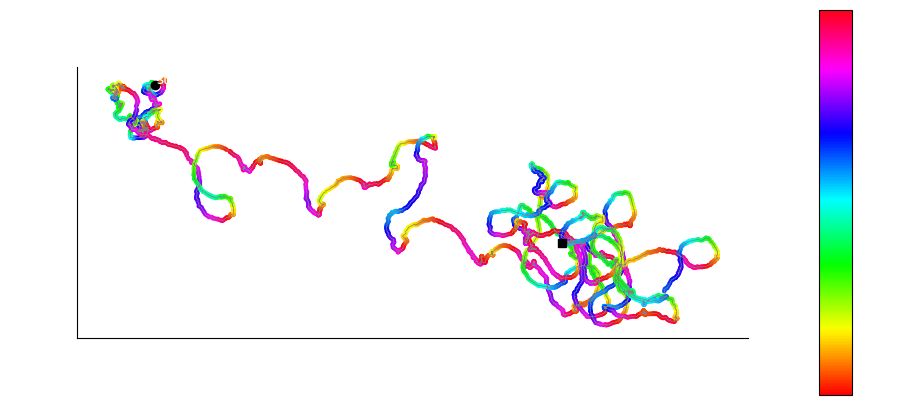

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [20, 1]})

# Main plot
axs[0].plot(posDf.x*dc2cm, posDf.y*dc2cm, color='grey', linewidth=0.5)
cb = axs[0].scatter(posDf.x*dc2cm, posDf.y*dc2cm, s=5, c=posDf.angle, cmap='hsv')

# Start & end markers
axs[0].plot(posDf.x[0]*dc2cm, posDf.y[0]*dc2cm, 'ok')
axs[0].text(posDf.x[0]*dc2cm + 0.2, posDf.y[0]*dc2cm + 0.2, 'start', color='white')
axs[0].plot(posDf.x.values[-1]*dc2cm, posDf.y.values[-2]*dc2cm, 'sk')

# Axis styling
axs[0].set_aspect('equal')
axs[0].set_xlabel('x [cm]', color='white')
axs[0].set_ylabel('y [cm]', color='white')
myAxisTheme(axs[0])

# Set tick colors to white
axs[0].tick_params(colors='white')
axs[1].tick_params(colors='white')

# Colorbar
cbar = plt.colorbar(cb, cax=axs[1], label='head direction [degree]')
cbar.ax.yaxis.label.set_color('white')   # Label color
cbar.ax.tick_params(colors='white')      # Tick color

# Make background transparent
fig.patch.set_alpha(0)
axs[0].patch.set_alpha(0)
axs[1].patch.set_alpha(0)

# Save with transparency
#plt.savefig("transparent_plot.png", dpi=300, transparent=True)
plt.show()


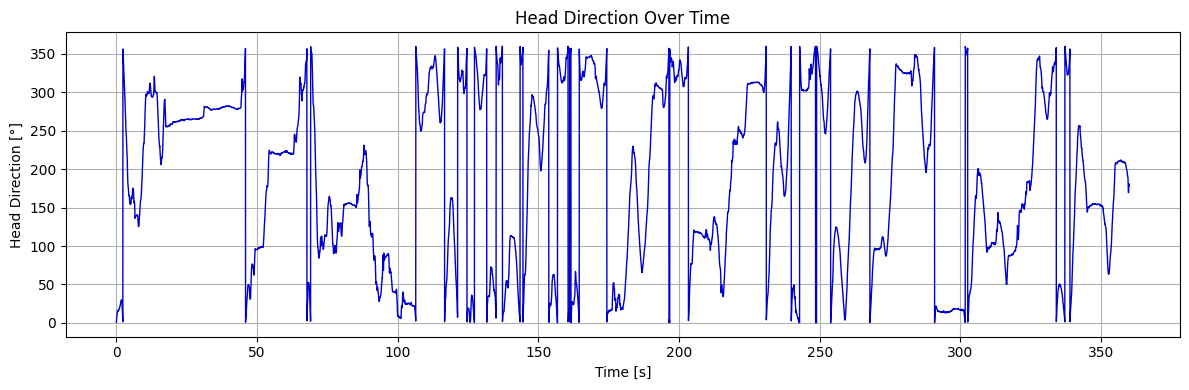

In [64]:
plt.figure(figsize=(12, 4))
plt.plot(posDf.time, posDf.angle, color='mediumblue', linewidth=1)
plt.xlabel('Time [s]')
plt.ylabel('Head Direction [°]')
plt.title('Head Direction Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


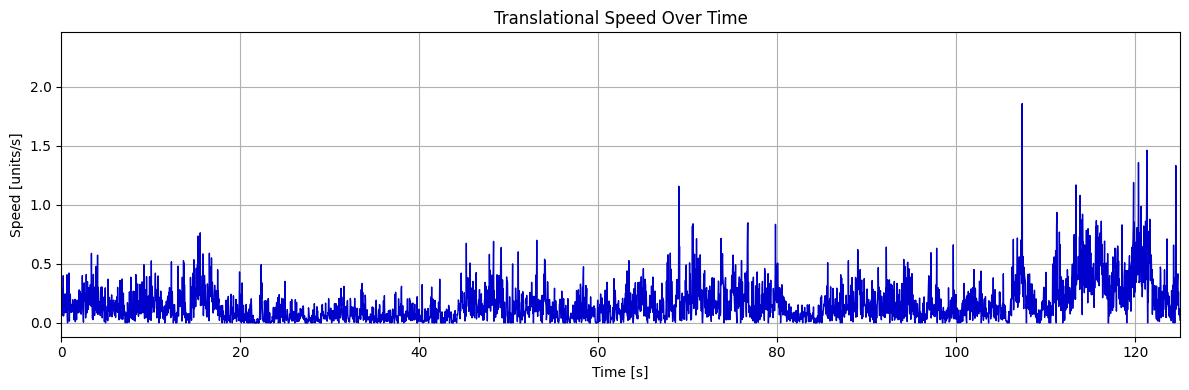

In [65]:
## tryting translational velocity

# Compute velocity components
vx = posDf['x'].diff() / posDf['dt']
vy = posDf['y'].diff() / posDf['dt']

# Compute total speed
speed = (vx**2 + vy**2) ** 0.5

# Plot
plt.figure(figsize=(12, 4))
plt.plot(posDf['time'], speed, color='mediumblue', linewidth=1)
plt.xlabel('Time [s]')
plt.ylabel('Speed [units/s]')  # change units if x,y are in ft or cm
plt.title('Translational Speed Over Time')
plt.xlim([0,125])
plt.grid(True)
plt.tight_layout()
plt.show()


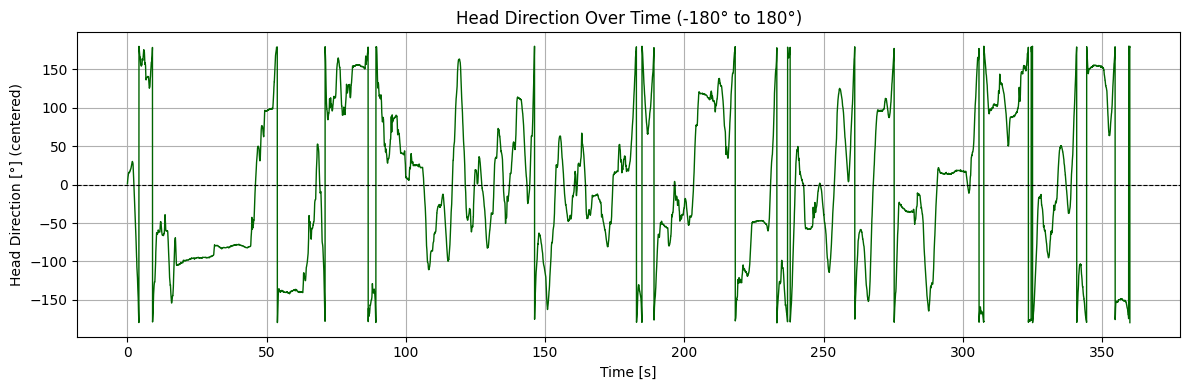

In [66]:
# Convert angle to range [-180, 180)
def normalize_angle(angle_deg):
    return ((angle_deg + 180) % 360) - 180

# Apply transformation
normalized_angle = normalize_angle(posDf.angle)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(posDf.time, normalized_angle, color='darkgreen', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Time [s]')
plt.ylabel('Head Direction [°] (centered)')
plt.title('Head Direction Over Time (-180° to 180°)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Import the stimulus angular position and plot it

In [67]:
# Replace with the full path or relative path to your CSV
df = pd.read_csv('/Users/hamida/Documents/GitHub/UnityStimulusProtocols/movies/50degpersec_angular_shift_over_time.csv')

# Check the first few rows
print(df.head())

     time_s  stimulus_angle_deg
0  0.000000          -45.000000
1  0.016744          -44.162791
2  0.033488          -43.325581
3  0.050233          -42.488372
4  0.066977          -41.651163


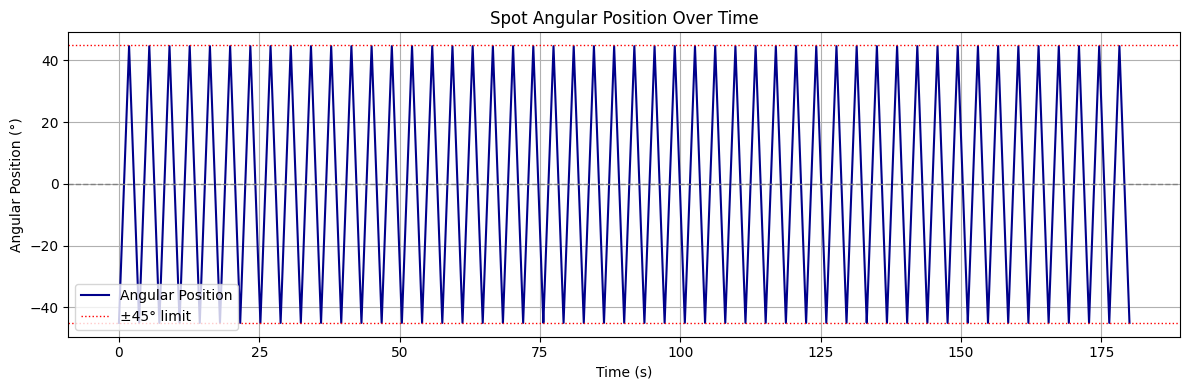

In [68]:
# Plot angle vs time
plt.figure(figsize=(12, 4))
plt.plot(df['time_s'], df['stimulus_angle_deg'], color='darkblue', label='Angular Position')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axhline(45, color='red', linestyle=':', linewidth=1, label='±45° limit')
plt.axhline(-45, color='red', linestyle=':', linewidth=1)
plt.title('Spot Angular Position Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Position (°)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

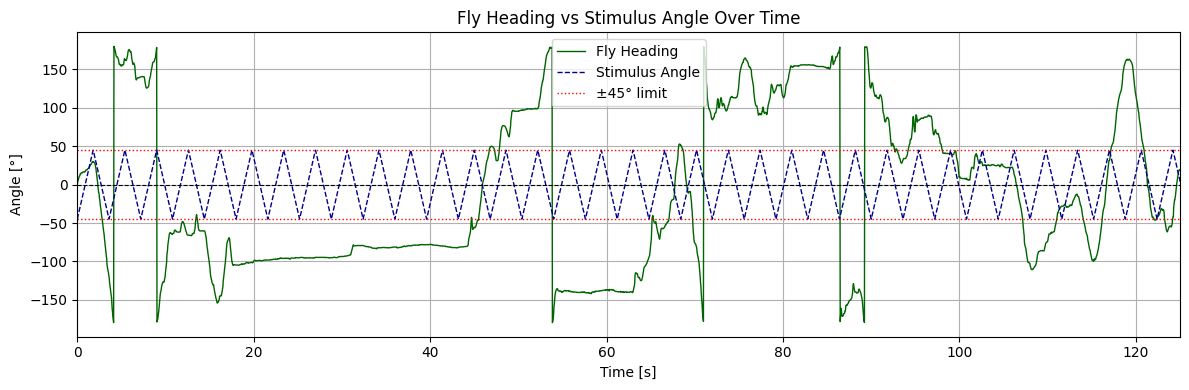

In [69]:


plt.figure(figsize=(12, 4))

# Plot fly heading
plt.plot(posDf.time, normalized_angle, color='darkgreen', linewidth=1, label='Fly Heading')

# Plot stimulus angle
plt.plot(df['time_s'], df['stimulus_angle_deg'], color='darkblue', linestyle='--', linewidth=1, label='Stimulus Angle')

# Reference lines
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(45, color='red', linestyle=':', linewidth=1, label='±45° limit')
plt.axhline(-45, color='red', linestyle=':', linewidth=1)
plt.xlim([0,125])

# Labels & style
plt.xlabel('Time [s]')
plt.ylabel('Angle [°]')
plt.title('Fly Heading vs Stimulus Angle Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


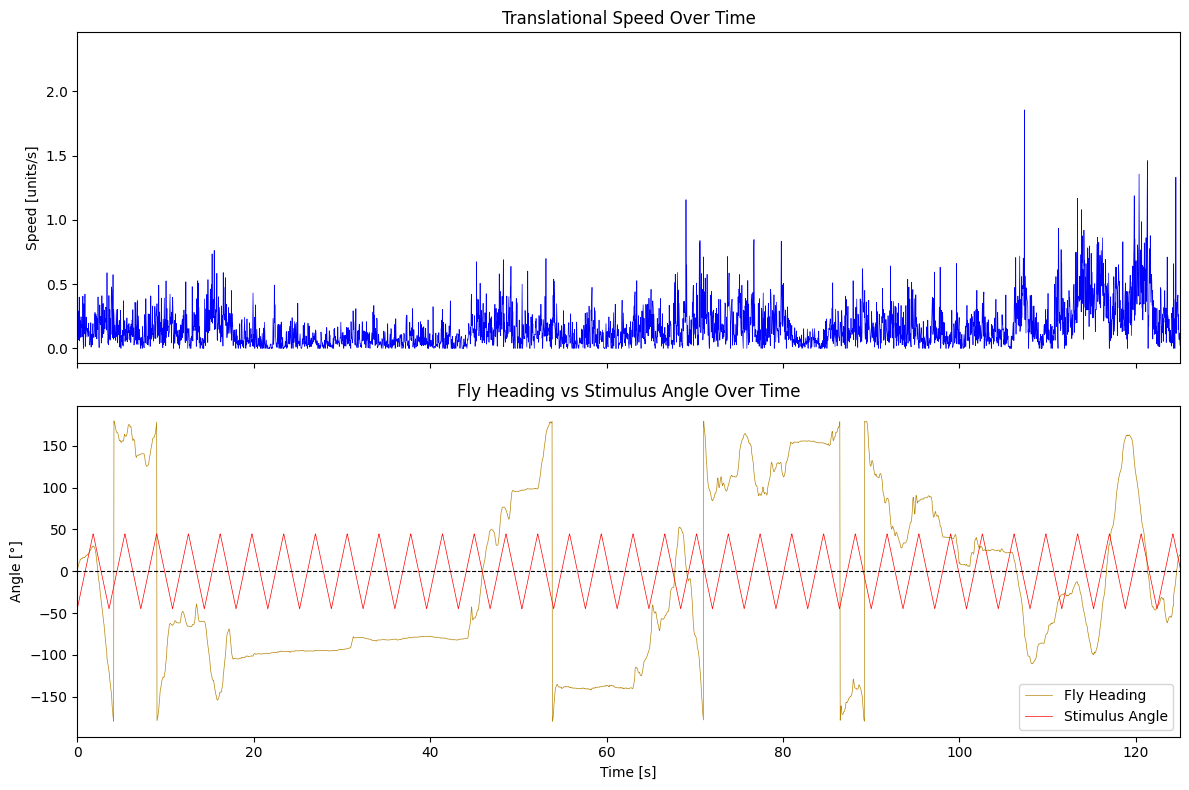

In [70]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# --- Top plot: Translational velocity ---
axs[0].plot(posDf['time'], speed, color='blue', linewidth=0.5)
axs[0].set_ylabel('Speed [units/s]')
axs[0].set_title('Translational Speed Over Time')
axs[0].set_xlim([0, 125])
axs[0].grid(False)

# --- Bottom plot: Heading vs Stimulus ---
axs[1].plot(posDf['time'], normalized_angle, color='darkgoldenrod', linewidth=0.5, label='Fly Heading')
axs[1].plot(df['time_s'], df['stimulus_angle_deg'], color='red', linewidth=0.5, label='Stimulus Angle')

# Reference lines
axs[1].axhline(0, color='black', linestyle='--', linewidth=0.8)
#axs[1].axhline(45, color='red', linestyle=':', linewidth=1, label='±45° limit')
#axs[1].axhline(-45, color='red', linestyle=':', linewidth=1)

axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Angle [°]')
axs[1].set_title('Fly Heading vs Stimulus Angle Over Time')
axs[1].grid(False)
axs[1].legend()

plt.tight_layout()
plt.show()


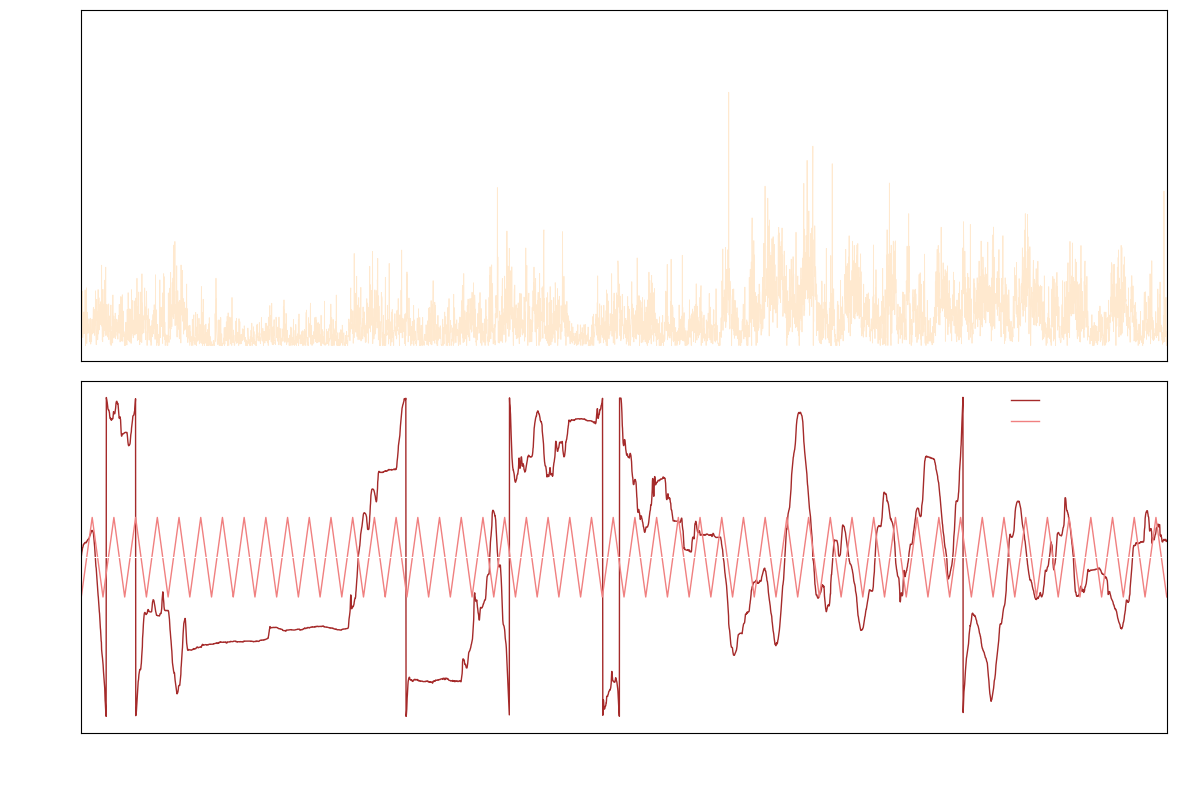

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True, facecolor='none')

# Make axes backgrounds transparent
for ax in axs:
    ax.set_facecolor('none')
    ax.tick_params(colors='white')  # tick labels
    ax.xaxis.label.set_color('white')  # x-axis label
    ax.yaxis.label.set_color('white')  # y-axis label
    ax.title.set_color('white')        # title text

# --- Top plot: Translational velocity ---
axs[0].plot(posDf['time'], speed, color='bisque', linewidth=0.6, alpha=0.8)
axs[0].set_ylabel('Translational velocity [units/s]', fontsize = 12)
#axs[0].set_title('Translational Speed Over Time')
axs[0].set_xlim([0, 180])
axs[0].grid(False)

# --- Bottom plot: Heading vs Stimulus ---
axs[1].plot(posDf['time'], normalized_angle, color='brown', linewidth=1, label='Fly Heading')
axs[1].plot(df['time_s'], df['stimulus_angle_deg'], color='lightcoral', linewidth=1, label='Stimulus Angle', alpha = 1)


# Reference line
axs[1].axhline(0, color='white', linestyle='-', linewidth=0.8)  

axs[1].set_xlabel('Time [s]', fontsize = 12)
axs[1].set_ylabel('Angle [°]', fontsize = 12)
#axs[1].set_title('Fly Heading vs Stimulus Angle Over Time')
axs[1].grid(False)

# Legend with white text
legend = axs[1].legend(facecolor='none', edgecolor='none')
for text in legend.get_texts():
    text.set_color("white")

plt.tight_layout()
#plt.savefig("combined_plot_white_text.png", dpi=300, transparent=True)
plt.show()




### Plot the correlation

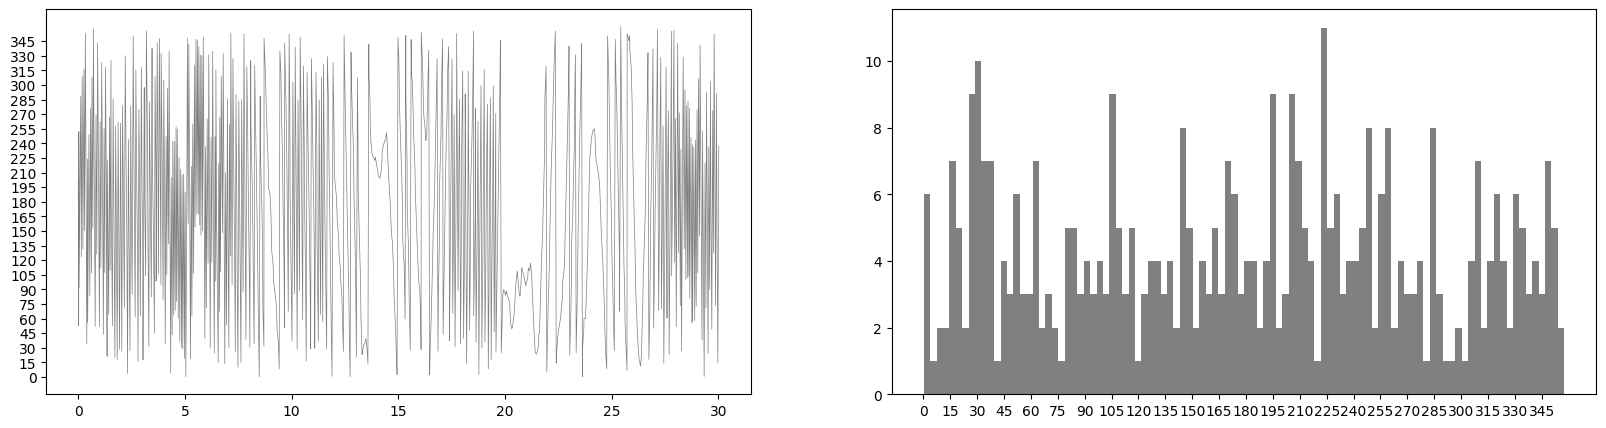

In [21]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(posDf.time,posDf.angle,color='grey', linewidth=0.5)
axs[0].set_yticks(np.arange(0, 360, 15));
axs[1].hist(posDf.angle[0:round(len(posDf.angle)/2)],color='grey', bins=100)
axs[1].set_xticks(np.arange(0, 360, 15));

In [ ]:
#posDf['dx'] = posDf.x.diff()
#posDf['dy'] = posDf.y.diff()
#posDf['dt'] = posDf.time.diff()  # or h

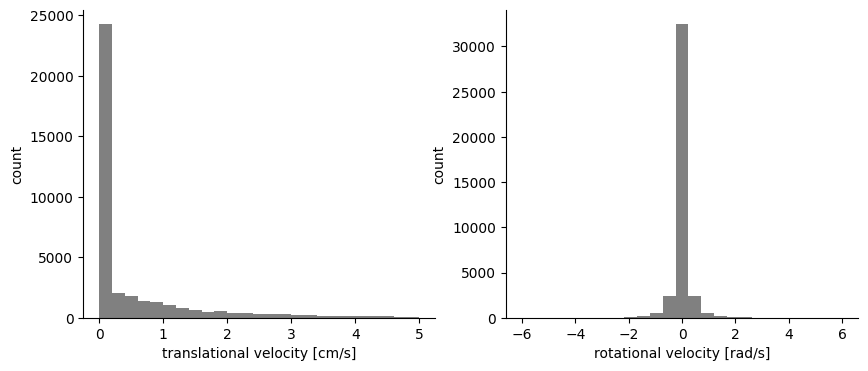

In [14]:
vt = np.hypot(posDf.dx_ft*dc2cm, posDf.dy_ft*dc2cm)/posDf.dt
vr = np.diff(posDf.angle*np.pi/180)/posDf.dt[1:]
fig, axs = plt.subplots(1,2,figsize=(10,4), gridspec_kw={'width_ratios':[1,1]})
axs[0].hist(vt,color='grey',bins=25, range=(0,5));
axs[0].set_xlabel('translational velocity [cm/s]')
axs[0].set_ylabel('count')
axs[1].hist(vr,color='grey',bins=25,range=(-6,6));
axs[1].set_xlabel('rotational velocity [rad/s]')
axs[1].set_ylabel('count')
for ax in axs:
    myAxisTheme(ax)

Position based on Fictrac tracking

In [14]:
print(len(ftDf))
ftDf.head()

8485


,frame,ficTracTReadMs,ficTracTWriteMs,wx_ft,wy_ft,wz_ft
0,1.0,0.0,0.0,0.005211,0.016086,0.032614
1,1.0,10.0,0.0,0.012141,0.034052,0.001051
2,1.0,29.0,0.0,0.004381,0.010562,0.010307
3,1.0,38.0,0.0,0.020681,0.016615,-0.001653
4,1.0,49.0,0.0,-0.008034,0.023312,0.009665


Photodiode signal and frame rate dataframe

In [15]:
print(len(tsDf))
tsDf.head()

2136380


,frame,time,dt,pdsig,imgfsig,pdFilt,framestart,counts,frameinterp,timeinterp,timenidaq
0,1.0,0.00,0.02,NaN,NaN,NaN,0,1,1.000000,0.000000,0.00000
1,1.0,0.00,0.02,NaN,NaN,NaN,0,1,1.500000,0.010000,0.00005
2,2.0,0.02,0.02,1.490894,0.865160,1.489284,1,1,2.000000,0.020000,0.00010
3,2.0,0.02,0.02,1.489284,1.146950,1.490894,0,1,2.001852,0.020015,0.00015
4,2.0,0.02,0.02,1.492182,1.299277,1.492182,0,1,2.003704,0.020031,0.00020


In [16]:
framesDf = tsDf[['frame','time','dt']].drop_duplicates().reset_index(level=0)[['frame','time','dt']]

In [17]:
framesDf.head()

,frame,time,dt
0,1.0,0.000000,0.020000
1,2.0,0.020000,0.020000
2,3.0,0.028325,0.008325
3,4.0,0.036650,0.008325
4,5.0,0.140614,0.103964


In [18]:
posDf['time'].max()

106.79170227050781

Fictrac updates come in at a higher rate than the VR frame rate. Fictrac can also only run for a subset of the VR run time and therefore the number of frames in fictrac and vr dataframes may not match.

#### Frame rate

In [19]:
# Extract frame rate setting
matching = [s for s in dat if "refreshRateHz" in s]
forceframerate = matching[0]["refreshRateHz"]
print(forceframerate) # frame rate in Hz

120


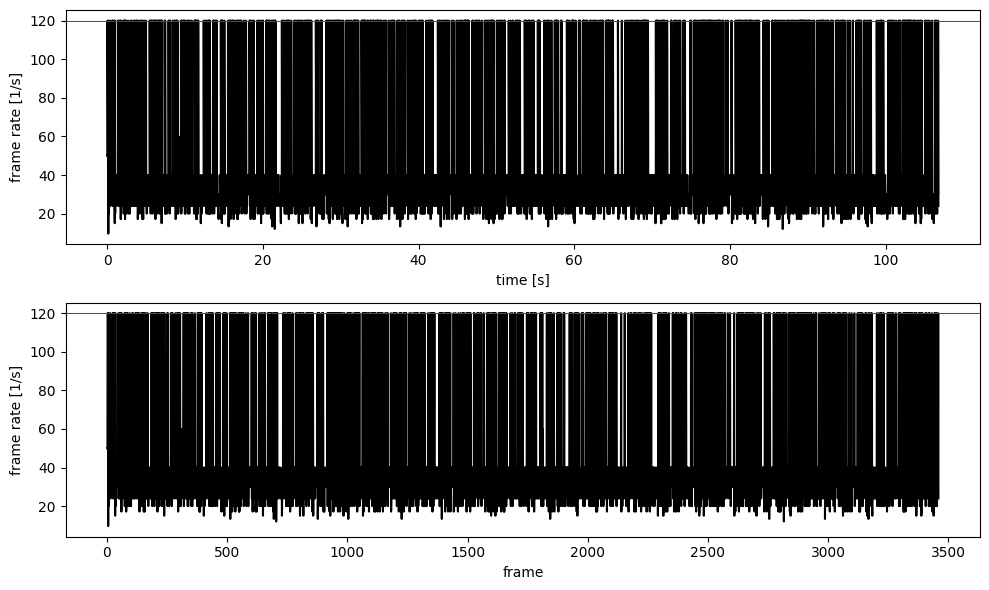

In [20]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(framesDf.time, 1/framesDf.dt, 'k')
ax[1].plot(framesDf.frame, 1/framesDf.dt, 'k')
ax[0].set_xlabel('time [s]')
ax[1].set_xlabel('frame');
for i in range(2):
    ax[i].axhline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[i].set_ylabel('frame rate [1/s]')
fig.tight_layout()

#####  Note: The remaining visuzalizations require that an analog photodiode signal was recorded. 

In [22]:
print(tsDf.head())
print(tsDf.columns)
print(len(tsDf))

   frame  time    dt     pdsig   imgfsig    pdFilt  framestart  counts  \
0    1.0  0.00  0.02       NaN       NaN       NaN           0       1   
1    1.0  0.00  0.02       NaN       NaN       NaN           0       1   
2    2.0  0.02  0.02  1.654493  1.671239  1.650307           1       1   
3    2.0  0.02  0.02  1.650307  1.271903  1.650307           0       1   
4    2.0  0.02  0.02  1.646764  1.230682  1.650307           0       1   

   frameinterp  timeinterp  timenidaq  
0     1.000000    0.000000    0.00000  
1     1.500000    0.010000    0.00005  
2     2.000000    0.020000    0.00010  
3     2.001420    0.020012    0.00015  
4     2.002841    0.020024    0.00020  
Index(['frame', 'time', 'dt', 'pdsig', 'imgfsig', 'pdFilt', 'framestart',
       'counts', 'frameinterp', 'timeinterp', 'timenidaq'],
      dtype='object')
6116818


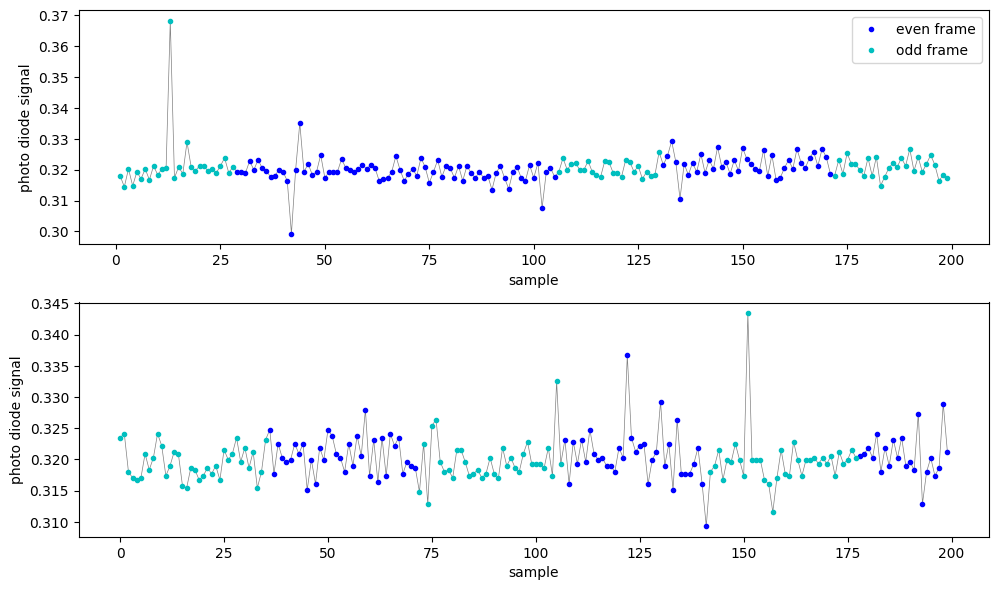

In [22]:
if "pdsig" in tsDf.columns:
    fig, ax = plt.subplots(2,1, figsize=(10,6))
    window = 200
    for i, ts in enumerate([0,5000]):
        ax[i].plot(range(window),tsDf.pdsig[ts:ts+window],'-',color='grey',linewidth=0.5)

        even = tsDf[ts:ts+window][tsDf['frame'][ts:ts+window]%2==1]
        ax[i].plot(np.arange(window)[tsDf['frame'][ts:ts+window].values%2==1], even.pdsig, 'b.', label='even frame')

        odd = tsDf[ts:ts+window][tsDf['frame'][ts:ts+window]%2==0]
        ax[i].plot(np.arange(window)[tsDf['frame'][ts:ts+window].values%2==0], odd.pdsig, 'c.', label=
                  'odd frame')

        ax[i].set_xlabel('time [s]')
        ax[i].set_ylabel('photo diode signal')
        ax[i].set_xlabel('sample');
    ax[0].legend()
    fig.tight_layout()

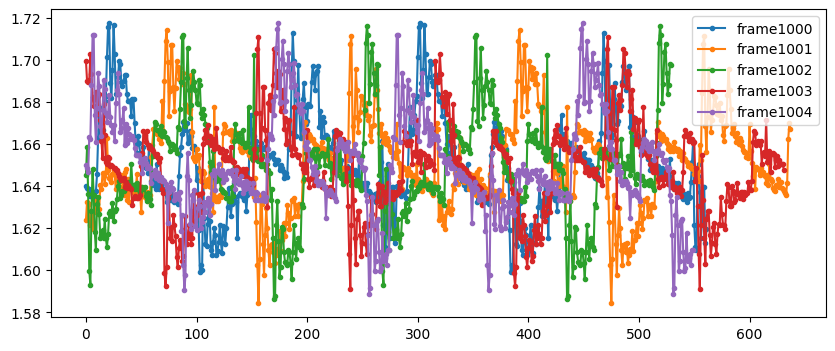

In [24]:
if "pdsig" in tsDf.columns:
    fig, ax = plt.subplots(1,1, figsize=(10,4))
    for f in range(1000, 1005):
        sig = tsDf.query('frame == '+str(float(f)))
        ax.plot(range(len(sig.pdsig)), sig.pdsig, '.-',  label='frame{}'.format(f))
    ax.legend()

Compute frame rate from photodiode signal

In [25]:
if "pdsig" in tsDf.columns:
    from scipy.signal import medfilt

    tsDf["pdFilt"]  = tsDf.pdsig.values
    tsDf.pdFilt[np.isfinite(tsDf.pdsig)] = medfilt(tsDf.pdsig[np.isfinite(tsDf.pdsig)])
    tsDf["pdThresh"]  = 1*(np.asarray(tsDf.pdFilt>=0.2+np.nanmedian(tsDf.pdFilt.values)))

/var/folders/nz/36wz0cz90t34jt3ryz6_n08w0000gp/T/ipykernel_15111/1790617142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsDf.pdFilt[np.isfinite(tsDf.pdsig)] = medfilt(tsDf.pdsig[np.isfinite(tsDf.pdsig)])


Generate interpolated time

In [26]:
from scipy import interpolate

tsDf['framestart'] = np.hstack([0,1*np.diff(tsDf.time)>0])

tsDf['counts'] = 1
sampperframe = tsDf.groupby('frame').sum()[['time','dt','counts']].reset_index(level=0)
sampperframe['fs'] = sampperframe.counts/sampperframe.dt

frameStartIndx = np.hstack((0,np.where(tsDf.framestart)[0]))
frameStartIndx = np.hstack((frameStartIndx, frameStartIndx[-1]+sampperframe.counts.values[-1]-1))
frameIndx = tsDf.index.values

frameNums = tsDf.frame[frameStartIndx].values.astype('int')
frameNumsInterp = np.hstack((frameNums, frameNums[-1]+1))

timeAtFramestart = tsDf.time[frameStartIndx].values

#generate interpolated frames
frameinterp_f = interpolate.interp1d(frameStartIndx,frameNums)
tsDf['frameinterp'] = frameinterp_f(frameIndx)

timeinterp_f = interpolate.interp1d(frameStartIndx,timeAtFramestart)
tsDf['timeinterp'] = timeinterp_f(frameIndx)

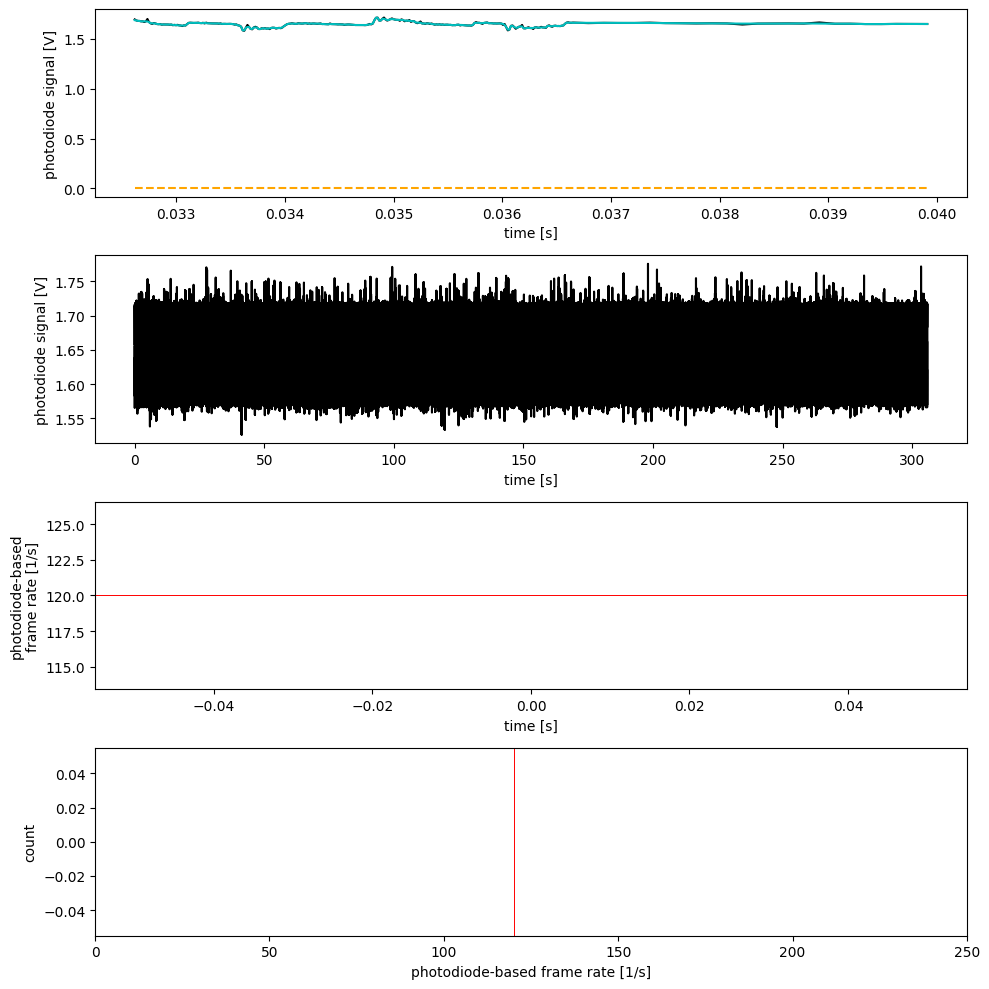

In [27]:
if "pdsig" in tsDf.columns:
    fig, ax = plt.subplots(4,1, figsize=(10,10))
    ts = 1000
    wind = 300
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdsig[ts:ts+wind], 'k')
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdFilt[ts:ts+wind], 'c')
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdThresh[ts:ts+wind], '--',color='orange')
    ax[0].set_ylabel('photodiode signal [V]')
    ax[0].set_xlabel('time [s]')

    pdChange = np.hstack((0,np.diff(tsDf.pdThresh)))
    pdChangeT = tsDf.timeinterp.values[abs( pdChange )>0]

    ax[1].plot(tsDf.timeinterp, tsDf.pdsig, 'k')
    #ax[1].set_ylim(0,250)
    ax[1].set_xlabel('time [s]')
    ax[1].set_ylabel('photodiode signal [V]')

    ax[2].plot(pdChangeT[1:], 1/np.diff(pdChangeT), '.', color='grey')
    #ax[2].set_ylim(0,250)
    ax[2].axhline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[2].set_xlabel('time [s]')
    ax[2].set_ylabel('photodiode-based\nframe rate [1/s]')

    ax[3].hist(1/np.diff(pdChangeT), 100, color='grey')
    ax[3].set_xlim(0,250)
    ax[3].axvline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[3].set_ylabel('count')
    ax[3].set_xlabel('photodiode-based frame rate [1/s]')

    fig.tight_layout()

In [28]:
counts = tsDf.groupby('frame').count()['pdsig'].values.astype('float')
counts[counts == 0] = float('NaN')
fr = 1/(counts/2000)

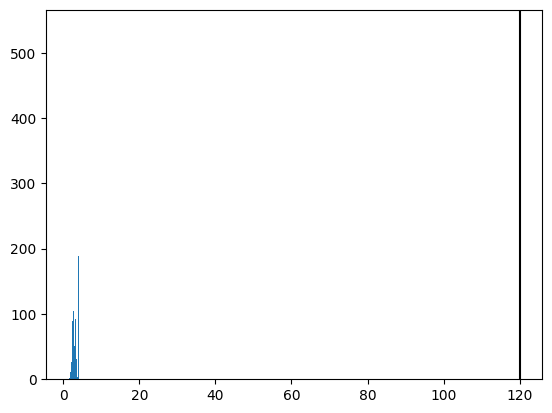

In [29]:
plt.hist(fr, bins = 100)
plt.axvline(120, color = 'k')

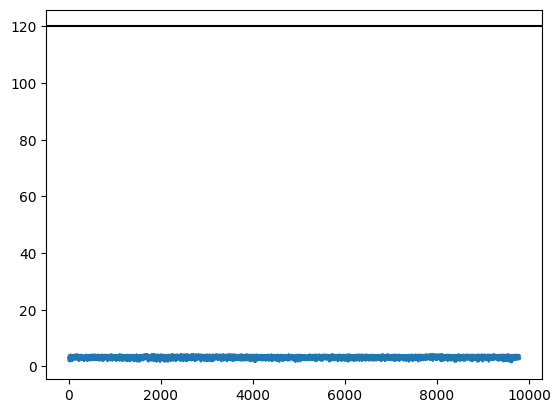

In [30]:
plt.plot(fr)
plt.axhline(120, color = 'k')
#plt.xlim(0, 600)

(0.0, 1000.0)

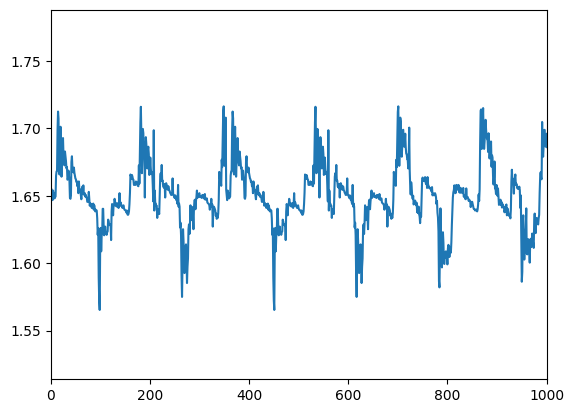

In [31]:
plt.plot(tsDf['pdsig'].values)
plt.xlim([0, 1000])
#plt.plot(tsDf['framestart'].values, 'o')

(1000.0, 2000.0)

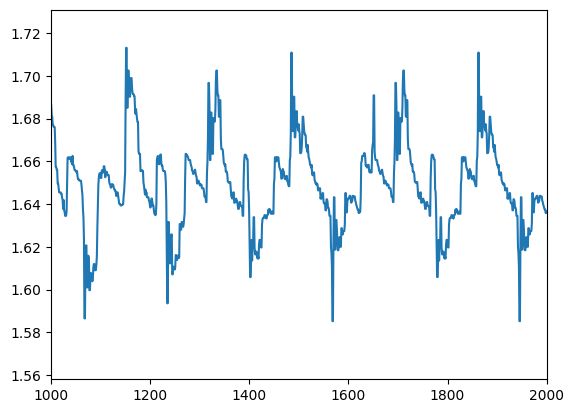

In [32]:
plt.plot(tsDf['pdFilt'].values)
plt.xlim([1000, 2000])

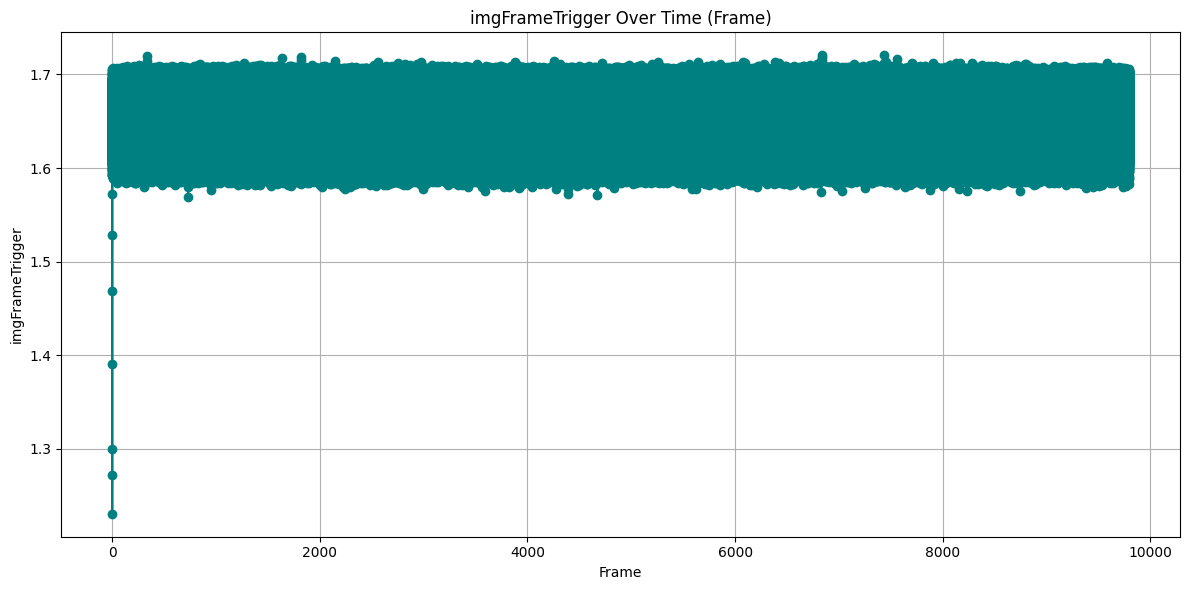

In [33]:
# Load logfile
dat = logproc.openUnityLog(dirName, fileName)

# Extract frame and imgFrameTrigger
frames = []
triggers = []

for entry in dat:
    if 'imgFrameTrigger' in entry:
        frames.append(entry.get('frame', np.nan))
        triggers.append(entry['imgFrameTrigger'])

# Create DataFrame
df = pd.DataFrame({'frame': frames, 'imgFrameTrigger': triggers})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['frame'], df['imgFrameTrigger'], marker='o', linestyle='-', color='teal')
plt.xlabel('Frame')
plt.ylabel('imgFrameTrigger')
plt.title('imgFrameTrigger Over Time (Frame)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
dat = logproc.openUnityLog(dirName, fileName)

for i in range(5):
    entry = dat[i]
    if 'imgFrameTrigger' in entry:
        print("imgFrameTrigger:", entry['imgFrameTrigger'])
    else:
        print("imgFrameTrigger: Not present")

    print(json.dumps(entry, sort_keys=True, indent=4))


imgFrameTrigger: Not present
{
    "frame": 0.0,
    "frameAfterSplash": 0.0,
    "sessionParameters": [
        "ficTracSpinWindow: 0",
        "ficTracSpinThreshold: 0",
        "timeoutSecs: 0",
        "backgroundCylinderTexture: C:\\Users\\hamida\\Desktop\\20degspot-75--45 to +45 deg\\start.json",
        "backgroundCylinderTexture2: "
    ],
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0
}
imgFrameTrigger: Not present
{
    "frame": 0.0,
    "frameAfterSplash": 0.0,
    "heightPixels": 720,
    "refreshRateHz": 120,
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0,
    "widthPixels": 480
}
imgFrameTrigger: Not present
{
    "ficTracBallRadius": 0.03999999910593033,
    "ficTracServerAddress": "127.0.0.1",
    "ficTracServerPort": 2000,
    "ficTracSmoothingCount": 1,
    "frame": 1.0,
    "frameAfterSplash": 0.0,
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0
}
imgFrameTrigger: Not present
{
    "colliderType": "MeshCollider",
    "frame": 1.0,
    "frameAfterSplash"

In [35]:
img_trigger_entries = [entry for entry in dat if 'imgFrameTrigger' in entry]
print(f"Total entries with imgFrameTrigger: {len(img_trigger_entries)}")

Total entries with imgFrameTrigger: 3058408


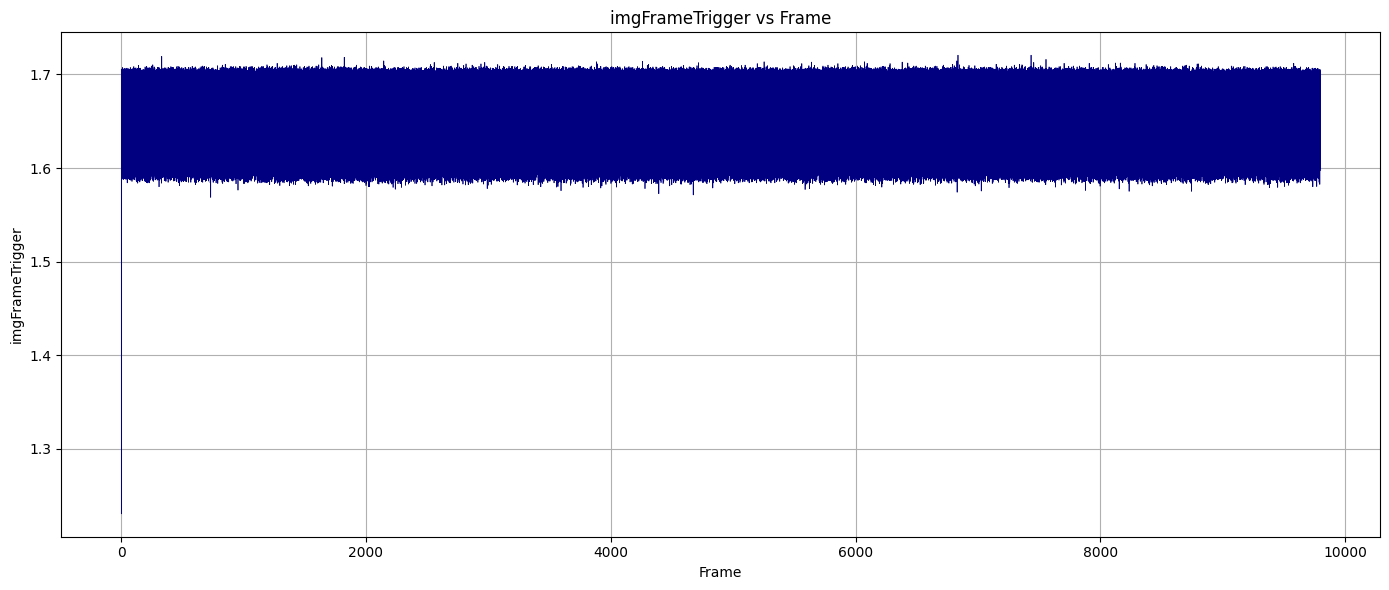

In [36]:
frames = []
triggers = []

for entry in dat:
    if 'imgFrameTrigger' in entry:
        frames.append(entry.get('frame', np.nan))
        triggers.append(entry['imgFrameTrigger'])

plt.figure(figsize=(14, 6))
plt.plot(frames, triggers, linestyle='-', color='navy', linewidth=0.5)
plt.xlabel('Frame')
plt.ylabel('imgFrameTrigger')
plt.title('imgFrameTrigger vs Frame')
plt.grid(True)
plt.tight_layout()
plt.show()

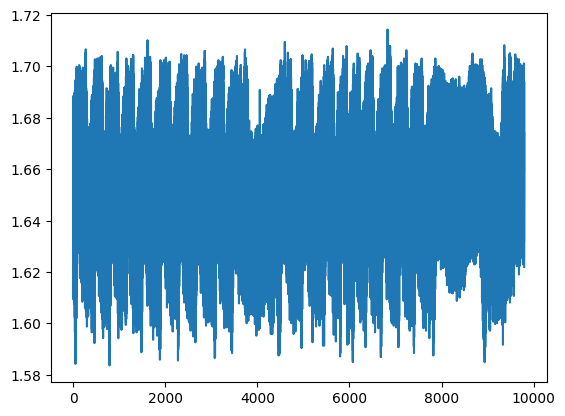

In [37]:
# Plot every 100th entry for clarity
plt.plot(frames[::100], triggers[::100])